<a href="https://colab.research.google.com/github/shravani1029/2216111_AIML_BOOTCAMP/blob/main/linear_regresstion_emissionsdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#step1
data="/content/drive/MyDrive/EmissionsData.csv"
import pandas as pd

df=pd.read_csv(data)#dataframe-2D

In [3]:
df.head()

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


In [4]:
df.tail()

,SNO,ENGINESIZE,CO2EMISSIONS
9,9,2.4,267.0
10,10,3.5,NaN
11,11,2.5,NaN
12,12,NaN,269.0
13,13,2.6,270.0


In [5]:
df.shape

(14, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


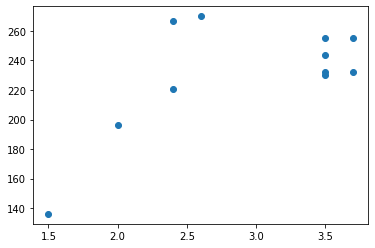

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.show()

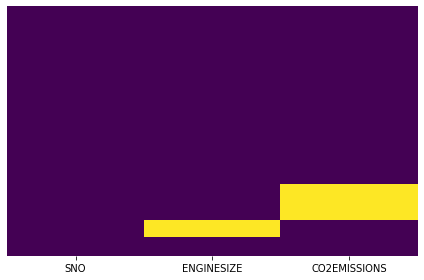

In [8]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)


In [9]:
import math
mean_eng=math.floor(df.ENGINESIZE.mean())
mean_eng

2

In [10]:
median_em=math.floor(df.CO2EMISSIONS.median())
median_em

238

In [11]:
df.ENGINESIZE=df.ENGINESIZE.fillna(mean_eng)

In [12]:
df.CO2EMISSIONS=df.CO2EMISSIONS.fillna(median_em)

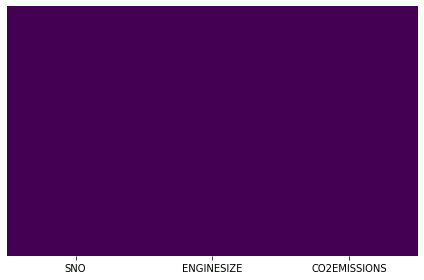

In [13]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)


In [14]:
from matplotlib.axis import YTick
#method 2 to load the data in the form of arrays -by library numpy
import numpy as np
x=np.array(df[['ENGINESIZE']])
y=np.array(df[['CO2EMISSIONS']])
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [238.],
       [238.],
       [269.],
       [270.]])

In [15]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [2. ],
       [2.6]])

In [16]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [238.],
       [238.],
       [269.],
       [270.]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train

array([[2.5],
       [1.5],
       [2.6],
       [2.4],
       [2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [2. ]])

In [20]:
y_train

array([[238.],
       [136.],
       [270.],
       [267.],
       [221.],
       [232.],
       [238.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [21]:
x_test

array([[3.7],
       [3.5],
       [3.5]])

In [22]:
y_test

array([[255.],
       [232.],
       [244.]])

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred=model.predict(x_test)
y_pred

array([[254.45004897],
       [250.00048972],
       [250.00048972]])

In [26]:
y_test

array([[255.],
       [232.],
       [244.]])

In [27]:
print("Predicted value for training data:",model.score(x_train,y_train))

Predicted value for training data: 0.18044658018223758


In [28]:
print("Predicted value for testing data:",model.score(x_test,y_test))

Predicted value for testing data: -0.36143307171130723


In [29]:
accuracy=model.score(x,y)*100
print(accuracy)

18.798196928942833


In [30]:
model.coef_

array([[22.24779628]])

In [31]:
model.intercept_


array([172.13320274])

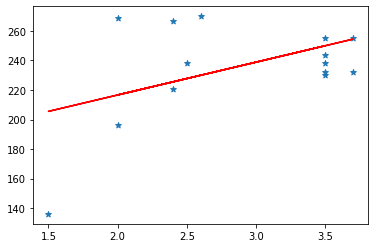

In [32]:
#Visualizing the Results
#Plotting the Linear Regression
line=model.coef_*x+model.intercept_
#y=mx+c
#plotting the test data
plt.scatter(x,y,marker='*')
plt.plot(x,line,color='red')
plt.show()

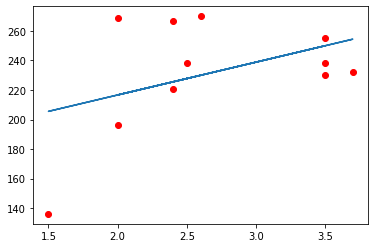

In [33]:
#Train set results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train))

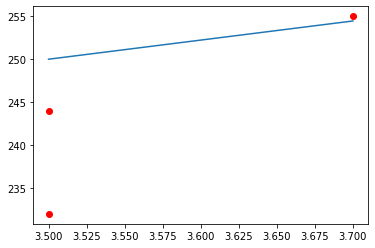

In [34]:
#Train set results
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test))